In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [4]:
NumTwentyTrain = len(twenty_train.data)
NumTwentyTest = len(twenty_test.data)
NumTwentyTotal = NumTwentyTrain + NumTwentyTest

print('twenty_train: {}. twenty_test: {}. twenty_total: {}.'.format(NumTwentyTrain,NumTwentyTest,NumTwentyTotal))

twenty_train: 11314. twenty_test: 7532. twenty_total: 18846.


In [5]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
print(twenty_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [7]:
print(twenty_train.target[0:10])

[ 7  4  4  1 14 16 13  3  2  4]


{0: 480, 1: 584, 2: 591, 3: 590, 4: 578, 5: 593, 6: 585, 7: 594, 8: 598, 9: 597, 10: 600, 11: 595, 12: 591, 13: 594, 14: 593, 15: 599, 16: 546, 17: 564, 18: 465, 19: 377}


F:\job\soft\python\envs\finalProject\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


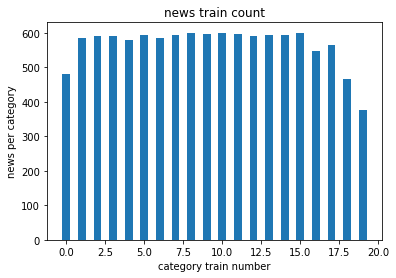

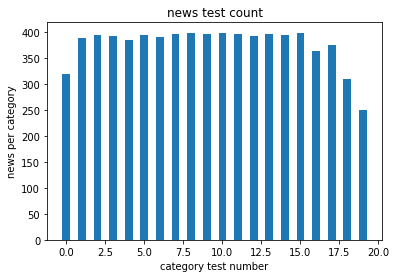

In [8]:
from collections import Counter

news_category_train = dict(Counter(twenty_train.target))
news_category_test = dict(Counter(twenty_test.target))
print(news_category_train)

xTrain = [val for val in news_category_train.keys()]
yTrain = [news_category_train[x] for x in xTrain]
xTest = [val for val in news_category_test.keys()]
yTest = [news_category_test[x] for x in xTest]

plt.bar(left=xTrain,height=yTrain,width=0.5)
plt.title('news train count')
plt.xlabel('category train number')
plt.ylabel('news per category')
plt.plot()
plt.show()

plt.bar(left=xTest,height=yTest,width=0.5)
plt.title('news test count')
plt.xlabel('category test number')
plt.ylabel('news per category')
plt.plot()
plt.show()

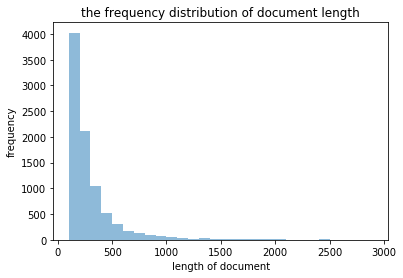

F:\job\soft\python\envs\finalProject\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


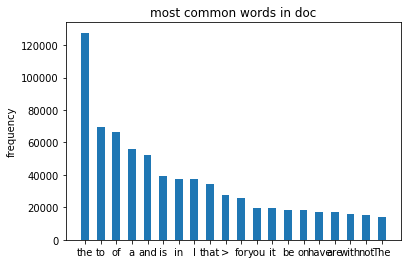

In [9]:
total_word_class = Counter()
d_length = []
def count_doc(text):
    for doc in text:
        d_length.append(len(doc.split()))
        for word in doc.split():
            total_word_class[word] += 1
    return d_length, total_word_class

train_d_length, train_total_word_class = count_doc(twenty_train.data)

plt.hist(d_length, bins=range(100,3000,100), histtype="stepfilled", alpha=.5)  
plt.xlabel('length of document')
plt.ylabel('frequency')
plt.title('the frequency distribution of document length')
plt.show()


x_val = [i[0] for i in train_total_word_class.most_common(20)]
y_val = [i[1] for i in train_total_word_class.most_common(20)]
plt.bar(left=range(20),height=y_val,width=0.5)
plt.xticks(range(20),x_val)
plt.title('most common words in doc')
plt.ylabel('frequency')
plt.show()

In [10]:
def processor(text): 

    return text.lower().strip()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(preprocessor=processor,stop_words='english')

X_train_tf = count_vect.fit_transform(twenty_train.data)
X_test_tf = count_vect.transform(twenty_test.data)

print("Shape of term-frequency train matrix:", X_train_tf.shape)
print("Shape of term-frequency test matrix:", X_test_tf.shape)

Shape of term-frequency train matrix: (11314, 129796)
Shape of term-frequency test matrix: (7532, 129796)


In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)
Y_train_tfidf = twenty_train.target
print('X_train_tfidf.shape:',X_train_tfidf.shape,'\t Y_train_tfidf:',Y_train_tfidf.shape)

Y_test_tf = twenty_test.target
print('X_test_tfidf.shape:',X_test_tf.shape,'\t Y_test_tfidf:',Y_test_tf.shape)

X_train_tfidf.shape: (11314, 129796) 	 Y_train_tfidf: (11314,)
X_test_tfidf.shape: (7532, 129796) 	 Y_test_tfidf: (7532,)


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train_tfidf, Y_train_tfidf, test_size=0.1, random_state=40)

In [14]:
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape)

(10182, 129796) (10182,) (1132, 129796) (1132,)


In [15]:
from sklearn.metrics import classification_report
def evaluate_score(model, x, y,target):
    predicted_y = model.predict(x)
    print('Model Name:',model.__class__.__name__)
    print('--------------------------------------------')
    print(classification_report(y, predicted_y,target_names=target))
    print('--------------------------------------------')
    print('accuracy_score:',accuracy_score(y, predicted_y),'\n')

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(random_state=10)
tree_model.fit(x_train, y_train)

targetNames = twenty_train.target_names
evaluate_score(tree_model, x_val, y_val, targetNames)

Model Name: DecisionTreeClassifier
--------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.62      0.74      0.67        39
           comp.graphics       0.52      0.47      0.50        57
 comp.os.ms-windows.misc       0.57      0.58      0.58        60
comp.sys.ibm.pc.hardware       0.59      0.55      0.57        62
   comp.sys.mac.hardware       0.61      0.74      0.67        46
          comp.windows.x       0.64      0.71      0.67        55
            misc.forsale       0.67      0.67      0.67        69
               rec.autos       0.58      0.60      0.59        58
         rec.motorcycles       0.90      0.84      0.87        67
      rec.sport.baseball       0.60      0.69      0.65        59
        rec.sport.hockey       0.78      0.77      0.78        74
               sci.crypt       0.91      0.87      0.89        70
         sci.electronics       0.46      0.38      0.42      

In [17]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(random_state=10)
svc_model.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=10, tol=0.0001,
     verbose=0)

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

models = [svc_model,nb_model]
for model in models:
    evaluate_score(model, x_val, y_val, targetNames)

Model Name: LinearSVC
--------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.93      0.95      0.94        39
           comp.graphics       0.85      0.89      0.87        57
 comp.os.ms-windows.misc       0.85      0.78      0.82        60
comp.sys.ibm.pc.hardware       0.79      0.81      0.80        62
   comp.sys.mac.hardware       0.90      0.96      0.93        46
          comp.windows.x       0.91      0.95      0.93        55
            misc.forsale       0.87      0.88      0.88        69
               rec.autos       0.85      0.91      0.88        58
         rec.motorcycles       0.97      0.97      0.97        67
      rec.sport.baseball       0.93      0.97      0.95        59
        rec.sport.hockey       0.99      0.99      0.99        74
               sci.crypt       0.97      0.99      0.98        70
         sci.electronics       0.86      0.92      0.89        66
        

调优

In [20]:
from sklearn.model_selection import GridSearchCV,KFold

C = [1.3,1.7,2.1,2.5]
tol = [1e-5, 1e-4, 1e-3]
max_iter = [0.8e3,1e3]
parameters = {'C': C, 'tol': tol,'max_iter' : max_iter}
kfold= KFold(n_splits=5,random_state=10)

svc_grid_obj = GridSearchCV(svc_model,parameters,cv=kfold)
svc_grid_obj.fit(x_train,y_train)

svc_best_param = svc_grid_obj.best_params_
best_svc = svc_grid_obj.best_estimator_
print('Best SVC parameters:',svc_best_param)

Best SVC parameters: {'tol': 1e-05, 'max_iter': 800.0, 'C': 1.7}


In [21]:
parameters = {'alpha':[round(0.005*i, 3) for i in range(1, 200, 5)]}
kfold= KFold(n_splits=5,random_state=10)

nb_grid_obj = GridSearchCV(nb_model,parameters,cv=kfold)
nb_grid_obj.fit(x_train,y_train)

nb_best_param = nb_grid_obj.best_params_
best_nb = nb_grid_obj.best_estimator_

In [22]:
print('Best NB parameters:',nb_best_param)

Best NB parameters: {'alpha': 0.03}


验证集

In [23]:
#best_models = [best_nb,best_svc, best_xgb]
best_models = [best_nb,best_svc]
for model in best_models:
    evaluate_score(model, x_val, y_val, targetNames)

Model Name: MultinomialNB
--------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.88      0.95      0.91        39
           comp.graphics       0.82      0.89      0.86        57
 comp.os.ms-windows.misc       0.92      0.80      0.86        60
comp.sys.ibm.pc.hardware       0.78      0.82      0.80        62
   comp.sys.mac.hardware       0.77      0.93      0.84        46
          comp.windows.x       0.95      0.98      0.96        55
            misc.forsale       0.87      0.84      0.85        69
               rec.autos       0.89      0.93      0.91        58
         rec.motorcycles       0.98      0.96      0.97        67
      rec.sport.baseball       0.93      0.97      0.95        59
        rec.sport.hockey       0.96      1.00      0.98        74
               sci.crypt       0.99      0.94      0.96        70
         sci.electronics       0.91      0.89      0.90        66
    

测试集

In [24]:
models_last = [tree_model,best_nb,best_svc]
testTargetNames = twenty_test.target_names
for model in models_last:
    evaluate_score(model,X_test_tf ,Y_test_tf , testTargetNames)

Model Name: DecisionTreeClassifier
--------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.45      0.49      0.47       319
           comp.graphics       0.36      0.39      0.38       389
 comp.os.ms-windows.misc       0.53      0.50      0.52       394
comp.sys.ibm.pc.hardware       0.37      0.38      0.37       392
   comp.sys.mac.hardware       0.48      0.48      0.48       385
          comp.windows.x       0.51      0.45      0.48       395
            misc.forsale       0.64      0.64      0.64       390
               rec.autos       0.33      0.42      0.37       396
         rec.motorcycles       0.72      0.74      0.73       398
      rec.sport.baseball       0.47      0.57      0.51       397
        rec.sport.hockey       0.44      0.58      0.50       399
               sci.crypt       0.74      0.57      0.64       396
         sci.electronics       0.37      0.32      0.34      

#############
深度学习词语相似度

text8 文档长度:17005208
text8一共有253854个单词


F:\job\soft\python\envs\finalProject\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764), ('in', 372201), ('a', 325873), ('to', 316376), ('zero', 264975), ('nine', 250430), ('two', 192644)]


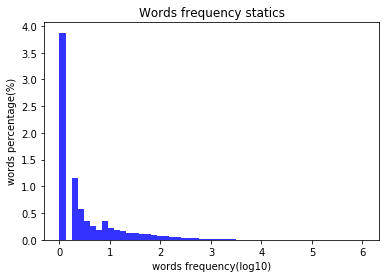

In [25]:
import re
from pandas import Series
import numpy as np
import pandas as pd
from IPython.display import display
# 分析tex8词库内容
def ana_text8():
    total_data = open('text8').read()
    words_raw = [word for word in re.split(r'\W+', total_data)] 
    text8_len = len(words_raw)
    print("text8 文档长度:{}".format(len(words_raw)) )
    word_dic = {}
    for word in words_raw:
        if word == "":
            continue
        if word in word_dic:
            word_dic[word] +=1
        else:
            word_dic[word] = 1
    print("text8一共有{}个单词".format(len(word_dic)))
    freq_word = Series((list(word_dic.values())))
    freq_word_log10 = np.log10(freq_word)
    fig, axes = plt.subplots(1,1)
    freq_word_log10.plot(kind="hist", bins = 50, normed = True, color = "b", alpha = 0.8)
    axes.set_title("Words frequency statics")
    axes.set_xlabel("words frequency(log10)")
    axes.set_ylabel("words percentage(%)")
    #获取最常用的10个单词
    word_sorted = sorted(word_dic.items(), key=lambda a : a[1], reverse = True)
    print(word_sorted[:10])
ana_text8()

In [26]:
import warnings 
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models import *
#准备数据
text =  word2vec.Text8Corpus('text8')   #train on the pre-build text8 corpus
w2v_model = Word2Vec(text, size = 128, min_count = 1,iter = 10,workers=4) #get the 128 dimensions word vector，使用CBOW模式
w2v_model.save('word2vec_model')

In [27]:
w2v_model=Word2Vec.load('word2vec_model')
w2v_modelWV = w2v_model.wv

In [28]:
#检查相似性
def model_test():
    try:
        print (w2v_modelWV["king"])
        print(w2v_modelWV.most_similar(
            positive=['woman', 'king'], negative=['man']))
        print(w2v_modelWV.most_similar_cosmul(
            positive=['woman', 'king'], negative=['man']))
        print("list which word doesn't match [breakfast cereal dinner lunch]: ",w2v_modelWV.doesnt_match("breakfast cereal dinner lunch".split()))
        print("The similarity of 'woman' and 'man' is:", 
                w2v_modelWV.similarity('woman', 'man'))
        print("The similarity of 'computer' and 'pc' is:",
                w2v_modelWV.similarity('computer', 'pc'))
        print("The similarity of 'database' and 'oracle' is:",
                w2v_modelWV.similarity('computer', 'hp'))
    except:
        pass
model_test()

[-0.8721307  -1.8740443  -2.3350718  -2.9137843  -0.66303295 -3.1591127
  0.46543646 -1.7406901   0.65109265 -1.8504096   2.4957666  -1.7221085
  1.3528452   1.7539244  -5.9312577  -4.4944134  -2.8946483  -1.0565953
 -0.9846978  -2.5742917  -2.1495545   1.6436088  -1.48606    -0.33748153
 -0.45820767  1.0012944   0.82938457 -0.06750702 -3.2895803  -2.935338
 -2.3681316   0.7293593   2.9821064   3.009144   -3.9615524   3.3853066
  1.4603266   1.8116536  -2.1820269   0.45166183  1.0562041   1.495336
 -0.68979084 -1.0675573  -1.8000679   0.1599465  -0.3681795  -0.00893859
 -0.56166697 -1.6522052  -1.6681215  -0.76201063  1.6363956  -1.7883986
  2.5948026  -1.5202684   0.24171647 -1.9729457   0.3423509   1.6394516
  0.48359537  1.0328946   1.1311274  -0.69176924 -1.2616321  -0.7551953
  1.3743256   0.6302025  -4.0650783   1.1675836   1.8970685  -1.6372162
 -0.9499149   3.7188227  -1.0616847  -1.3898417   0.54454994  3.2144566
 -0.4589778   0.7321216   0.14873846 -0.46067247  4.316725    1.

#构建神经网络

In [29]:
#去除各种标点符号和标签，获得清洗过的数据
import re

def preprocessor(text):
    text = re.sub('[\W]+', ' ', text.lower()) 

    return text.strip()
train_data = list(map(preprocessor,twenty_train.data))
test_data = list(map(preprocessor,twenty_test.data))

print(len(train_data),len(test_data))
print(train_data[0].split())

11314 7532
['from', 'lerxst', 'wam', 'umd', 'edu', 'where', 's', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac3', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', '15', 'i', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'i', 'saw', 'the', 'other', 'day', 'it', 'was', 'a', '2', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', '60s', 'early', '70s', 'it', 'was', 'called', 'a', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'i', 'know', 'if', 'anyone', 'can', 'tellme', 'a', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'e', 'mail', 'tha

In [30]:
#获得基于词频v.index 的词频统计，eg. model_index_word['you'] = 206 model_index_word['beauty'] = 3714
def index_word(model):
    temp = {}
    for k,v in model:
        temp[k] = v.index
    return temp
model_index_word = index_word(w2v_modelWV.vocab.items())
print(len(model_index_word),model_index_word['from'] )

253854 27


In [31]:
trainX_raw = []
testX_raw = []

for sentence in train_data: 
    tmp = []
    for word in sentence.split():
        if word in model_index_word:
            tmp.append(model_index_word[word])
        else:
            tmp.append(len(model_index_word))
    trainX_raw.append(tmp)
    
for sentence in test_data:
    tmp = []
    for word in sentence.split():
        if word in model_index_word:
            tmp.append(model_index_word[word])
        else:
            tmp.append(len(model_index_word))
    testX_raw.append(tmp)

In [32]:
print(len(trainX_raw),len(testX_raw),trainX_raw[0])

11314 7532 [27, 114244, 123835, 79608, 7731, 99, 14, 608, 1797, 575, 153, 982, 10, 32, 74813, 12557, 1559, 253854, 123835, 79608, 7731, 708, 126, 1, 4153, 353, 786, 821, 253854, 71, 17, 29597, 87, 2616, 107, 59, 159, 60067, 745, 24, 32, 982, 71, 797, 0, 42, 136, 26, 17, 5, 253854, 2931, 1326, 982, 4171, 6, 31, 27, 0, 328, 253854, 127, 253854, 26, 17, 88, 5, 40454, 0, 4370, 39, 2267, 220, 4, 535, 0, 927, 35229, 17, 833, 27, 0, 994, 1, 0, 340, 32, 10, 49, 71, 1005, 87, 2616, 52, 253854, 5, 517, 120, 1029, 39987, 80, 1, 442, 99, 32, 982, 10, 108, 95, 28, 3536, 3864, 206, 38, 24, 32, 21188, 2398, 982, 3876, 111, 2216, 4421, 2791, 753, 6, 206, 18, 771, 5933, 114244]


In [33]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D,Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from keras.models import Model
from keras.callbacks import EarlyStopping

# 文本序列长度
MAX_SEQUENCE_LENGTH = 500
# 单词最大数量
MAX_NUM_WORDS = 12000
# 词向量长度
EMBEDDING_DIM = w2v_modelWV.syn0.shape[1]

F:\job\soft\python\envs\finalProject\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [34]:
import numpy as np
x_train = pad_sequences(trainX_raw, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(testX_raw, maxlen=MAX_SEQUENCE_LENGTH)
# Converting labels to binary vectors
y_train = to_categorical(np.asarray(twenty_train.target))
y_test = to_categorical(np.asarray(twenty_test.target))

In [35]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(11314, 500) (11314, 20) (7532, 500) (7532, 20)


In [36]:
#获得基于model_index_word 的word_index 转换，eg. model_index_word[123] = 'you'   model_index_word[456] = 'beauty'
def word_index(vocab_dict):
    temp = {}
    for word,i in enumerate(vocab_dict):
        temp[word] = i
    return temp
word_index = word_index(model_index_word)

In [48]:
# prepare embedding matrix

embedding_matrix = np.zeros([(len(word_index)+1), EMBEDDING_DIM])
embedding_matrix[:-1] = w2v_modelWV.syn0

In [49]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

#神经网络搭建， Embedding --> Dropout --> LSTM --> Dense -->Output

In [50]:
from keras.callbacks import TensorBoard

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=25)
tensorBoard = TensorBoard(log_dir = './output/LSTMlogs')

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
#调大dropout防止过拟合，从0.3调整为0.5
x = Dropout(0.5)(embedded_sequences)
x = LSTM(128)(x)
x = Dense(128, activation='relu')(x)
preds = Dense(y_train.shape[1], activation='softmax')(x)

modelLSTM = Model(sequence_input, preds)
modelLSTM.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [51]:
#使用了callbacks函数，使用earlystopping来选择最优的epochs，不然网络综述过拟合的，如下：
#es=EarlyStopping(patience=5, monitor='val_loss')
#callbacks=[tensorBoard,es]
es=EarlyStopping(patience=5, monitor='val_loss')
modelLSTM.fit(x_train, y_train,
          batch_size=256,
          epochs=50,
          validation_data=(x_test, y_test),
          callbacks=[tensorBoard,es])

Train on 11314 samples, validate on 7532 samples
Epoch 1/50
11314/11314 [==============================] - 938s 83ms/step - loss: 2.8825 - acc: 0.1114 - val_loss: 3.0589 - val_acc: 0.1085
Epoch 2/50
11314/11314 [==============================] - 941s 83ms/step - loss: 2.4971 - acc: 0.1998 - val_loss: 2.5446 - val_acc: 0.1948
Epoch 3/50
11314/11314 [==============================] - 942s 83ms/step - loss: 2.2935 - acc: 0.2467 - val_loss: 2.2303 - val_acc: 0.2570
Epoch 4/50
11314/11314 [==============================] - 944s 83ms/step - loss: 2.0919 - acc: 0.3077 - val_loss: 2.2051 - val_acc: 0.2868
Epoch 5/50
11314/11314 [==============================] - 944s 83ms/step - loss: 1.9623 - acc: 0.3395 - val_loss: 2.1146 - val_acc: 0.3054
Epoch 6/50
11314/11314 [==============================] - 942s 83ms/step - loss: 1.8279 - acc: 0.3855 - val_loss: 2.1782 - val_acc: 0.3193
Epoch 7/50
11314/11314 [==============================] - 944s 83ms/step - loss: 1.7451 - acc: 0.4073 - val_loss: 2.2

In [ ]:
#神经网络搭建， Embedding --> Dropout --> GRU --> Dense -->Output

In [43]:
from keras.layers import GRU

tensorBoard = TensorBoard(log_dir = './output/GRUlogs')

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedded_sequences = embedding_layer(sequence_input)
x = Dropout(0.2)(embedded_sequences)
x = GRU(256,recurrent_dropout=0.2)(x)

preds = Dense(y_train.shape[1], activation='softmax')(x)

modelGRU = Model(sequence_input, preds)
modelGRU.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [44]:
#增加earlystoppiing，防止过拟合。
es=EarlyStopping(patience=5, monitor='val_loss')
modelGRU.fit(x_train, y_train,
          batch_size=256,
          epochs=20,
          validation_data=(x_test, y_test),   
          callbacks=[tensorBoard,es])

Train on 11314 samples, validate on 7532 samples
Epoch 1/20
11314/11314 [==============================] - 28157s 2s/step - loss: 2.8540 - acc: 0.1465 - val_loss: 2.6456 - val_acc: 0.2067
Epoch 2/20
11314/11314 [==============================] - 1207s 107ms/step - loss: 2.3968 - acc: 0.2651 - val_loss: 2.3216 - val_acc: 0.2570
Epoch 3/20
11314/11314 [==============================] - 1282s 113ms/step - loss: 2.0534 - acc: 0.3389 - val_loss: 2.0398 - val_acc: 0.3196
Epoch 4/20
11314/11314 [==============================] - 1325s 117ms/step - loss: 1.7955 - acc: 0.4167 - val_loss: 1.7174 - val_acc: 0.4077
Epoch 5/20
11314/11314 [==============================] - 1330s 118ms/step - loss: 1.4718 - acc: 0.5154 - val_loss: 1.4378 - val_acc: 0.5100
Epoch 6/20
11314/11314 [==============================] - 1344s 119ms/step - loss: 1.2049 - acc: 0.6086 - val_loss: 1.2011 - val_acc: 0.5896
Epoch 7/20
11314/11314 [==============================] - 1340s 118ms/step - loss: 1.0199 - acc: 0.6631 - v